# Markaziy Tendentsiya Ko'rsatkichlari (Estimates of Location)

Markaziy tendentsiya ko'rsatkichlari ma'lumotlar to'plamining "markaziy" yoki "tipik" qiymatini aniqlashda ishlatiladi. Bu bo'limda biz turli xil markaziy tendentsiya ko'rsatkichlarini o'rganamiz va ularning qo'llanilishini misollar bilan ko'rsatamiz.

## Asosiy Tushunchalar:

- **O'rtacha (Mean)** - Barcha qiymatlar yig'indisi soniga bo'lingan qiymat
- **Og'irlikli o'rtacha (Weighted mean)** - Barcha qiymatlar o'z og'irligiga ko'paytirilib, og'irliklar yig'indisiga bo'lingan qiymat  
- **Median** - Ma'lumotlarning yarmi yuqorida, yarmi pastda joylashadigan qiymat
- **Percentil (Percentile)** - Ma'lumotlarning P foizi undan kichik bo'lgan qiymat
- **Og'irlikli median (Weighted median)** - Og'irliklarning yarmi yuqorida, yarmi pastda bo'ladigan qiymat
- **Kesilgan o'rtacha (Trimmed mean)** - Ekstremal qiymatlarning ma'lum qismini olib tashlab hisoblangan o'rtacha
- **Robust** - Ekstremal qiymatlarga sezgir bo'lmagan usul
- **Chiqaruvchi qiymat (Outlier)** - Ma'lumotlarning aksariyatidan ancha farq qiladigan qiymat

In [14]:
# Import required libraries
import numpy as np # -> sonli ma'lumotlar bilan ishlash uchun kutubxona
import pandas as pd # -> dataframe bilan ishlash uchun kutubxona
import matplotlib.pyplot as plt # -> grafiklar chizish uchun kutubxona
import seaborn as sns # -> vizualization
from scipy import stats # -> statistika uchun
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better visualization
plt.style.use('default')
sns.set_palette("husl")

print("Kutubxonalar muvaffaqiyatli yuklandi!")

Kutubxonalar muvaffaqiyatli yuklandi!


In [15]:
# Create sample datasets for demonstration
np.random.seed(42)

# Normal distribution data
normal_data = np.random.normal(50, 10, 1000)

# Data with outliers
outlier_data = np.concatenate([np.random.normal(50, 10, 950), [150, 160, 170, 180, 200]])

# Skewed data
skewed_data = np.random.exponential(2, 1000)

# Student scores data
student_scores = np.random.normal(75, 15, 100)
student_scores = np.clip(student_scores, 0, 100)  # Clip to 0-100 range

# Sample weights for weighted calculations
weights = np.random.uniform(0.5, 2.0, len(student_scores))

print("Namunaviy ma'lumotlar yaratildi:")
print(f"Normal taqsimot: {len(normal_data)} ta element")
print(f"Outlier bilan ma'lumotlar: {len(outlier_data)} ta element") 
print(f"Qiyshiq taqsimot: {len(skewed_data)} ta element")
print(f"Talaba baholari: {len(student_scores)} ta element")

Namunaviy ma'lumotlar yaratildi:
Normal taqsimot: 1000 ta element
Outlier bilan ma'lumotlar: 955 ta element
Qiyshiq taqsimot: 1000 ta element
Talaba baholari: 100 ta element


## 1. O'rtacha (Mean)

**Ta'rif:** Barcha qiymatlar yig'indisi soniga bo'lingan qiymat. Bu eng oddiy va eng ko'p ishlatiladigan markaziy tendentsiya ko'rsatkichidir.

**Formula:** 
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

**Xususiyatlari:**
- Barcha qiymatlarni hisobga oladi
- Outlier (chiqaruvchi qiymat)larga sezgir
- Matematik hisob-kitoblarda qulay
- Normal taqsimotda eng yaxshi markaziy ko'rsatkich

**Qachon ishlatiladi:**
- Ma'lumotlar normal taqsimotga yaqin bo'lganda
- Outlierlar yo'q yoki kam bo'lganda
- Barcha qiymatlar bir xil ahamiyatga ega bo'lganda

In [16]:
# Calculate mean for different datasets
print("=== O'RTACHA (MEAN) HISOBLASH ===\n")

# 1. Normal data mean
normal_mean = np.mean(normal_data)
print(f"Normal taqsimot o'rtachasi: {normal_mean:.2f}")

# 2. Data with outliers mean  
outlier_mean = np.mean(outlier_data)
print(f"Outlier bilan ma'lumotlar o'rtachasi: {outlier_mean:.2f}")

# 3. Student scores mean
student_mean = np.mean(student_scores)
print(f"Talaba baholari o'rtachasi: {student_mean:.2f}")

# 4. Manual calculation example
sample_data = [10, 20, 30, 40, 50]
manual_mean = sum(sample_data) / len(sample_data)
numpy_mean = np.mean(sample_data)

print(f"\nQo'lda hisoblash misoli:")
print(f"Ma'lumotlar: {sample_data}")
print(f"Qo'lda hisoblangan o'rtacha: {manual_mean}")
print(f"NumPy bilan hisoblangan: {numpy_mean}")

# 5. Comparison with pandas
df = pd.DataFrame({'scores': student_scores})
pandas_mean = df['scores'].mean()
print(f"\nPandas bilan hisoblangan o'rtacha: {pandas_mean:.2f}")

=== O'RTACHA (MEAN) HISOBLASH ===

Normal taqsimot o'rtachasi: 50.19
Outlier bilan ma'lumotlar o'rtachasi: 51.31
Talaba baholari o'rtachasi: 73.31

Qo'lda hisoblash misoli:
Ma'lumotlar: [10, 20, 30, 40, 50]
Qo'lda hisoblangan o'rtacha: 30.0
NumPy bilan hisoblangan: 30.0

Pandas bilan hisoblangan o'rtacha: 73.31


## 2. Og'irlikli O'rtacha (Weighted Mean)

**Ta'rif:** Barcha qiymatlar o'z og'irligiga ko'paytirilib, og'irliklar yig'indisiga bo'lingan qiymat. Bu usulda har bir qiymat turli ahamiyatga ega bo'ladi.

**Formula:** 
$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

bu yerda $w_i$ - har bir $x_i$ qiymatining og'irligi.

**Xususiyatlari:**
- Turli ahamiyatdagi qiymatlarni hisobga oladi
- Og'irliklar yig'indisi 1 ga teng bo'lishi shart emas
- Oddiy o'rtachaning umumlashtirilgan ko'rinishi
- Moliya va iqtisodiyotda keng qo'llaniladi

**Qachon ishlatiladi:**
- Ba'zi qiymatlar boshqalardan muhimroq bo'lganda
- Turli hajmdagi guruhlarni taqqoslashda
- Portfolio tahlilida
- O'rtacha baho hisoblashda (kredit soatlari bilan)

In [24]:
# Calculate weighted mean
print("=== OG'IRLIKLI O'RTACHA (WEIGHTED MEAN) HISOBLASH ===\n")

# 1. Simple weighted mean example
grades = np.array([85, 90, 78, 92, 85])
credits = np.array([9, 4, 2, 3, 3])  # Credit hours as weights

weighted_mean_manual = np.sum(grades * credits) / np.sum(credits)
weighted_mean_numpy = np.average(grades, weights=credits)
simple_mean = np.mean(grades)
print("Oddiy o'rtacha: ", simple_mean, "Og'irlikli o'rtacha: ", weighted_mean_numpy, "Farqi: ", abs(simple_mean - weighted_mean_numpy))

print("Fan bo'yicha baholar va kredit soatlari:")
for i, (grade, credit) in enumerate(zip(grades, credits)):
    print(f"  Fan {i+1}: {grade} ball, {credit} kredit soat")


print(f"\nQo'lda hisoblangan og'irlikli o'rtacha: {weighted_mean_manual:.2f}")
print(f"NumPy bilan hisoblangan: {weighted_mean_numpy:.2f}")
print(f"Oddiy o'rtacha (og'irliksiz): {np.mean(grades):.2f}")

# 2. Student scores with random weights
weighted_student_mean = np.average(student_scores, weights=weights)
regular_student_mean = np.mean(student_scores)

print(f"\nTalaba baholari:")
print(f"Og'irlikli o'rtacha: {weighted_student_mean:.2f}")
print(f"Oddiy o'rtacha: {regular_student_mean:.2f}")
print(f"Farq: {abs(weighted_student_mean - regular_student_mean):.2f}")

# 3. Portfolio weighted return example
stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
returns = np.array([12.5, 8.3, 15.2, -2.1])  # Annual returns in %
portfolio_weights = np.array([0.4, 0.3, 0.2, 0.1])  # Portfolio allocation

portfolio_return = np.average(returns, weights=portfolio_weights)

print(f"\nPortfolio misoli:")
for stock, ret, weight in zip(stocks, returns, portfolio_weights):
    print(f"  {stock}: {ret}% daromad, {weight*100}% og'irlik")
print(f"Portfolio og'irlikli daromadi: {portfolio_return:.2f}%")

=== OG'IRLIKLI O'RTACHA (WEIGHTED MEAN) HISOBLASH ===

Oddiy o'rtacha:  86.0 Og'irlikli o'rtacha:  86.28571428571429 Farqi:  0.2857142857142918
Fan bo'yicha baholar va kredit soatlari:
  Fan 1: 85 ball, 9 kredit soat
  Fan 2: 90 ball, 4 kredit soat
  Fan 3: 78 ball, 2 kredit soat
  Fan 4: 92 ball, 3 kredit soat
  Fan 5: 85 ball, 3 kredit soat

Qo'lda hisoblangan og'irlikli o'rtacha: 86.29
NumPy bilan hisoblangan: 86.29
Oddiy o'rtacha (og'irliksiz): 86.00

Talaba baholari:
Og'irlikli o'rtacha: 74.50
Oddiy o'rtacha: 73.31
Farq: 1.19

Portfolio misoli:
  AAPL: 12.5% daromad, 40.0% og'irlik
  GOOGL: 8.3% daromad, 30.0% og'irlik
  MSFT: 15.2% daromad, 20.0% og'irlik
  TSLA: -2.1% daromad, 10.0% og'irlik
Portfolio og'irlikli daromadi: 10.32%


## 3. Median

**Ta'rif:** Ma'lumotlarning yarmi yuqorida, yarmi pastda joylashadigan qiymat. Bu 50-foizlik percentilga teng.

**Hisoblash:**
- Ma'lumotlarni o'sish tartibida saralash
- Agar elementlar soni toq bo'lsa: o'rtadagi element
- Agar elementlar soni juft bo'lsa: o'rtadagi ikki elementning o'rtachasi

**Xususiyatlari:**
- Outlier (chiqaruvchi qiymat)larga sezgir emas (robust)
- Faqat ma'lumotlarning tartibiga bog'liq
- Qiyshiq taqsimotlarda o'rtachadan yaxshiroq
- Hisoblash uchun ma'lumotlarni saralash kerak

**Qachon ishlatiladi:**
- Ma'lumotlarda outlierlar mavjud bo'lganda
- Qiyshiq taqsimotlarda
- Daromad, uy-joy narxlari kabi ma'lumotlarda
- Robust statistik tahlil kerak bo'lganda

In [28]:
# Calculate median for different datasets
print("=== MEDIAN HISOBLASH ===\n")

# 1. Compare mean vs median for normal data
normal_median = np.median(normal_data)
print(f"Normal taqsimot:")
print(f"  O'rtacha: {np.mean(normal_data):.2f}")
print(f"  Median: {normal_median:.2f}")
print(f"  Farq: {abs(np.mean(normal_data) - normal_median):.2f}")

# 2. Compare mean vs median for data with outliers
outlier_median = np.median(outlier_data)
print(f"\nOutlier bilan ma'lumotlar:")
print(f"  O'rtacha: {np.mean(outlier_data):.2f}")
print(f"  Median: {outlier_median:.2f}")
print(f"  Farq: {abs(np.mean(outlier_data) - outlier_median):.2f}")

# 3. Manual median calculation for odd number of elements
odd_sample = [1, 10, 11, 3, 5, 7, 9]
sorted_odd = sorted(odd_sample)
manual_median_odd = sorted_odd[len(sorted_odd) // 2]

print(f"\nToq sonli elementlar misoli:")
print(f"Ma'lumotlar: {odd_sample}")
print(f"Saralangan: {sorted_odd}")
print(f"Median (qo'lda): {manual_median_odd}")
print(f"Median (NumPy): {np.median(odd_sample)}")

# 4. Manual median calculation for even number of elements
even_sample = [2, 10, 11, 4, 6, 8]
sorted_even = sorted(even_sample)
n = len(sorted_even)
manual_median_even = (sorted_even[n//2 - 1] + sorted_even[n//2]) / 2

print(f"\nJuft sonli elementlar misoli:")
print(f"Ma'lumotlar: {even_sample}")
print(f"Saralangan: {sorted_even}")
print(f"Median (qo'lda): {manual_median_even}")
print(f"Median (NumPy): {np.median(even_sample)}")

# 5. Demonstrate robustness to outliers
clean_data = [45, 47, 48, 50, 52, 53, 55]
data_with_outlier = clean_data + [200]  # Add extreme outlier

print(f"\nRobustlik namoyishi:")
print(f"Toza ma'lumotlar: {clean_data}")
print(f"  O'rtacha: {np.mean(clean_data):.2f}")
print(f"  Median: {np.median(clean_data):.2f}")

print(f"Outlier bilan: {data_with_outlier}")
print(f"  O'rtacha: {np.mean(data_with_outlier):.2f}")
print(f"  Median: {np.median(data_with_outlier):.2f}")
print(f"Outlier ta'siri - O'rtachaga: {np.mean(data_with_outlier) - np.mean(clean_data):.2f}")
print(f"Outlier ta'siri - Medianga: {np.median(data_with_outlier) - np.median(clean_data):.2f}")

=== MEDIAN HISOBLASH ===

Normal taqsimot:
  O'rtacha: 50.19
  Median: 50.25
  Farq: 0.06

Outlier bilan ma'lumotlar:
  O'rtacha: 51.31
  Median: 50.60
  Farq: 0.71

Toq sonli elementlar misoli:
Ma'lumotlar: [1, 10, 11, 3, 5, 7, 9]
Saralangan: [1, 3, 5, 7, 9, 10, 11]
Median (qo'lda): 7
Median (NumPy): 7.0

Juft sonli elementlar misoli:
Ma'lumotlar: [2, 10, 11, 4, 6, 8]
Saralangan: [2, 4, 6, 8, 10, 11]
Median (qo'lda): 7.0
Median (NumPy): 7.0

Robustlik namoyishi:
Toza ma'lumotlar: [45, 47, 48, 50, 52, 53, 55]
  O'rtacha: 50.00
  Median: 50.00
Outlier bilan: [45, 47, 48, 50, 52, 53, 55, 200]
  O'rtacha: 68.75
  Median: 51.00
Outlier ta'siri - O'rtachaga: 18.75
Outlier ta'siri - Medianga: 1.00


## 4. Percentil (Percentile)

**Ta'rif:** Ma'lumotlarning P foizi undan kichik bo'lgan qiymat. Percentillar ma'lumotlarni 100 ta teng qismga bo'ladi.

**Asosiy percentillar:**
- 25-percentil (Q1): Birinchi kvartil
- 50-percentil (Q2): Median
- 75-percentil (Q3): Uchinchi kvartil

**Xususiyatlari:**
- Ma'lumotlarning taqsimotini batafsil ko'rsatadi
- Outlierlarni aniqlashda yordam beradi
- Nisbiy holatni aniqlash uchun ishlatiladi
- Box plot diagrammalari asosi

**Qachon ishlatiladi:**
- Ma'lumotlarning taqsimotini o'rganishda
- Qiymatlarni taqqoslashda (masalan, test natijalari)
- Outlierlarni aniqlashda
- Rang (ranking) tizimlarida

In [ ]:
# Calculate percentiles
print("=== PERCENTILLAR HISOBLASH ===\n")

# 1. Basic percentiles calculation
data_sample = student_scores

# Calculate key percentiles
p25 = np.percentile(data_sample, 25)   # First quartile
p50 = np.percentile(data_sample, 50)   # Median
p75 = np.percentile(data_sample, 75)   # Third quartile
p90 = np.percentile(data_sample, 90)   # 90th percentile
p95 = np.percentile(data_sample, 95)   # 95th percentile

print("Talaba baholari uchun percentillar:")
print(f"25-percentil (Q1): {p25:.2f}")
print(f"50-percentil (Median): {p50:.2f}")
print(f"75-percentil (Q3): {p75:.2f}")
print(f"90-percentil: {p90:.2f}")
print(f"95-percentil: {p95:.2f}")

# 2. Multiple percentiles at once
percentiles_list = [10, 25, 50, 75, 90, 95, 99]
percentiles_values = np.percentile(data_sample, percentiles_list)

print(f"\nBir nechta percentillar:")
for p, v in zip(percentiles_list, percentiles_values):
    print(f"{p:2d}-percentil: {v:6.2f}")

# 3. Using pandas for percentiles
df_scores = pd.DataFrame({'scores': data_sample})
pandas_describe = df_scores.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

print(f"\nPandas describe() natijasi:")
print(pandas_describe)

# 4. Interquartile Range (IQR) calculation
iqr = p75 - p25
print(f"\nInterquartile Range (IQR): {iqr:.2f}")
print(f"IQR formulasi: Q3 - Q1 = {p75:.2f} - {p25:.2f} = {iqr:.2f}")

# 5. Find percentile rank of a specific value
target_score = 80
percentile_rank = stats.percentileofscore(data_sample, target_score)
print(f"\n{target_score} ballning percentil ranki: {percentile_rank:.1f}")
print(f"Bu shuni anglatadiki, talabalarning {percentile_rank:.1f}% {target_score} balldan kam olgan")

# 6. Outlier detection using IQR method
lower_bound = p25 - 1.5 * iqr
upper_bound = p75 + 1.5 * iqr
outliers = data_sample[(data_sample < lower_bound) | (data_sample > upper_bound)]

print(f"\nIQR usuli bilan outlierlar aniqlash:")
print(f"Pastki chegara: Q1 - 1.5*IQR = {lower_bound:.2f}")
print(f"Yuqori chegara: Q3 + 1.5*IQR = {upper_bound:.2f}")
print(f"Topilgan outlierlar soni: {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier qiymatlari: {outliers[:5]}")  # Show first 5 outliers

=== PERCENTILLAR HISOBLASH ===

Talaba baholari uchun percentillar:
25-percentil (Q1): 65.41
50-percentil (Median): 71.64
75-percentil (Q3): 81.14
90-percentil: 89.71
95-percentil: 100.00

Bir nechta percentillar:
10-percentil:  57.99
25-percentil:  65.41
50-percentil:  71.64
75-percentil:  81.14
90-percentil:  89.71
95-percentil: 100.00
99-percentil: 100.00

Pandas describe() natijasi:
           scores
count  100.000000
mean    73.305469
std     13.059483
min     46.084911
10%     57.985024
25%     65.413355
50%     71.644823
75%     81.135498
90%     89.714903
95%    100.000000
max    100.000000

Interquartile Range (IQR): 15.72
IQR formulasi: Q3 - Q1 = 81.14 - 65.41 = 15.72

80 ballning percentil rangi: 72.0
Bu shuni anglatadiki, talabalarning 72.0% 80 balldan kam olgan

IQR usuli bilan outlierlar aniqlash:
Pastki chegara: Q1 - 1.5*IQR = 41.83
Yuqori chegara: Q3 + 1.5*IQR = 104.72
Topilgan outlierlar soni: 0


## 5. Og'irlikli Median (Weighted Median)

**Ta'rif:** Og'irliklarning yarmi yuqorida, yarmi pastda bo'ladigan qiymat. Bu oddiy medianning og'irlikli versiyasidir.

**Hisoblash algoritmi:**
1. Qiymatlarni o'sish tartibida saralash
2. Kumulyativ og'irliklarni hisoblash
3. Umumiy og'irlikning yarmiga teng yoki undan katta bo'lgan birinchi nuqtani topish

**Xususiyatlari:**
- Oddiy median kabi outlierga bardoshli
- Turli ahamiyatdagi qiymatlarni hisobga oladi
- Og'irlikli o'rtachaga qaraganda robust
- Moliya va iqtisodiyotda muhim

**Qachon ishlatiladi:**
- Turli ahamiyatdagi ma'lumotlar bilan ishlashda
- Outlierlar mavjud bo'lgan og'irlikli ma'lumotlarda
- Portfolio tahlilida risk ko'rsatkichlari uchun
- Survey ma'lumotlarida

In [29]:
# Weighted median calculation (manual implementation)
def weighted_median(data, weights):
    """
    Calculate weighted median
    """
    # Sort data and weights by data values
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    
    # Calculate cumulative weights
    cumulative_weights = np.cumsum(sorted_weights)
    total_weight = cumulative_weights[-1]
    
    # Find the median position
    median_weight = total_weight / 2
    
    # Find the weighted median
    median_index = np.searchsorted(cumulative_weights, median_weight)
    
    if median_index < len(sorted_data):
        if cumulative_weights[median_index] == median_weight and median_index > 0:
            # Exact middle point between two values
            return (sorted_data[median_index] + sorted_data[median_index + 1]) / 2
        else:
            return sorted_data[median_index]
    else:
        return sorted_data[-1]

print("=== OG'IRLIKLI MEDIAN HISOBLASH ===\n")

# 1. Simple example with equal weights (should equal regular median)
simple_data = np.array([10, 20, 30, 40, 50])
equal_weights = np.array([1, 1, 1, 1, 1])

regular_median = np.median(simple_data)
weighted_median_equal = weighted_median(simple_data, equal_weights)

print("Teng og'irliklar bilan misol:")
print(f"Ma'lumotlar: {simple_data}")
print(f"Og'irliklar: {equal_weights}")
print(f"Oddiy median: {regular_median}")
print(f"Og'irlikli median: {weighted_median_equal}")

# 2. Example with different weights
data_values = np.array([10, 20, 30, 40, 50])
different_weights = np.array([1, 2, 3, 4, 5])

weighted_median_diff = weighted_median(data_values, different_weights)

print(f"\nTurli og'irliklar bilan misol:")
print(f"Ma'lumotlar: {data_values}")
print(f"Og'irliklar: {different_weights}")
print(f"Oddiy median: {np.median(data_values)}")
print(f"Og'irlikli median: {weighted_median_diff}")

# 3. Student grades example with credit hours
grades = np.array([85, 90, 78, 92, 88, 76, 94])
credits = np.array([3, 4, 2, 3, 4, 1, 2])

regular_grade_median = np.median(grades)
weighted_grade_median = weighted_median(grades, credits)

print(f"\nTalaba baholari misoli:")
print("Fan | Baho | Kredit")
print("----|------|-------")
for i, (grade, credit) in enumerate(zip(grades, credits)):
    print(f" {i+1:2d} | {grade:3d}  |   {credit}")

print(f"\nOddiy median: {regular_grade_median:.1f}")
print(f"Og'irlikli median: {weighted_grade_median:.1f}")

# 4. Compare with weighted mean
weighted_mean_grades = np.average(grades, weights=credits)
print(f"Og'irlikli o'rtacha: {weighted_mean_grades:.1f}")

# 5. Portfolio example with market caps as weights
stock_returns = np.array([12.5, 8.3, 15.2, -2.1, 6.7])
market_caps = np.array([2.5, 1.8, 2.2, 0.5, 1.2])  # Trillions of dollars

portfolio_median = weighted_median(stock_returns, market_caps)
portfolio_mean = np.average(stock_returns, weights=market_caps)

print(f"\nPortfolio misoli:")
print("Stock | Return | Market Cap")
print("------|--------|----------")
for i, (ret, cap) in enumerate(zip(stock_returns, market_caps)):
    print(f"  {i+1}   | {ret:5.1f}% | ${cap:.1f}T")

print(f"\nOg'irlikli median daromad: {portfolio_median:.1f}%")
print(f"Og'irlikli o'rtacha daromad: {portfolio_mean:.1f}%")

=== OG'IRLIKLI MEDIAN HISOBLASH ===

Teng og'irliklar bilan misol:
Ma'lumotlar: [10 20 30 40 50]
Og'irliklar: [1 1 1 1 1]
Oddiy median: 30.0
Og'irlikli median: 30

Turli og'irliklar bilan misol:
Ma'lumotlar: [10 20 30 40 50]
Og'irliklar: [1 2 3 4 5]
Oddiy median: 30.0
Og'irlikli median: 40

Talaba baholari misoli:
Fan | Baho | Kredit
----|------|-------
  1 |  85  |   3
  2 |  90  |   4
  3 |  78  |   2
  4 |  92  |   3
  5 |  88  |   4
  6 |  76  |   1
  7 |  94  |   2

Oddiy median: 88.0
Og'irlikli median: 88.0
Og'irlikli o'rtacha: 87.5

Portfolio misoli:
Stock | Return | Market Cap
------|--------|----------
  1   |  12.5% | $2.5T
  2   |   8.3% | $1.8T
  3   |  15.2% | $2.2T
  4   |  -2.1% | $0.5T
  5   |   6.7% | $1.2T

Og'irlikli median daromad: 12.5%
Og'irlikli o'rtacha daromad: 10.6%


## 6. Kesilgan O'rtacha (Trimmed Mean)

**Ta'rif:** Ekstremal qiymatlarning ma'lum qismini (odatda 5-25%) olib tashlab hisoblangan o'rtacha. Bu usul outlierlarning ta'sirini kamaytiradi.

**Hisoblash:**
1. Ma'lumotlarni saralash
2. Har ikkala uchdan belgilangan foizni olib tashlash
3. Qolgan qiymatlar uchun oddiy o'rtacha hisoblash

**Xususiyatlari:**
- Outlierlarning ta'sirini kamaytiradi
- O'rtacha va medianning o'rtasidagi xususiyat
- Robust statistikaning bir turi
- Sport musobaqalarida keng qo'llaniladi

**Qachon ishlatiladi:**
- Ma'lumotlarda ba'zi outlierlar mavjud bo'lganda
- Normal taqsimotga yaqin, lekin ekstremal qiymatlar bor
- Sport natijalarini baholashda
- Ilmiy tadqiqotlarda anomal natijalarni chiqarishda

In [11]:
# Trimmed mean calculation
print("=== KESILGAN O'RTACHA (TRIMMED MEAN) HISOBLASH ===\n")

# 1. Using scipy.stats.trim_mean
data_with_outliers = outlier_data.copy()

# Calculate trimmed means with different trim percentages
trim_5 = stats.trim_mean(data_with_outliers, 0.05)    # 5% trim (2.5% from each end)
trim_10 = stats.trim_mean(data_with_outliers, 0.10)   # 10% trim
trim_20 = stats.trim_mean(data_with_outliers, 0.20)   # 20% trim

regular_mean = np.mean(data_with_outliers)
median_val = np.median(data_with_outliers)

print("Outlier bilan ma'lumotlar uchun turli usullar:")
print(f"Oddiy o'rtacha:      {regular_mean:.2f}")
print(f"5% kesilgan o'rtacha:  {trim_5:.2f}")
print(f"10% kesilgan o'rtacha: {trim_10:.2f}")
print(f"20% kesilgan o'rtacha: {trim_20:.2f}")
print(f"Median:               {median_val:.2f}")

# 2. Manual trimmed mean implementation
def manual_trimmed_mean(data, trim_percent):
    """
    Manually calculate trimmed mean
    """
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Calculate number of elements to trim from each end
    trim_count = int(n * trim_percent / 2)
    
    if trim_count > 0:
        trimmed_data = sorted_data[trim_count:-trim_count]
    else:
        trimmed_data = sorted_data
    
    return np.mean(trimmed_data)

# Verify manual calculation
manual_trim_10 = manual_trimmed_mean(data_with_outliers, 0.10)
print(f"\nQo'lda hisoblangan 10% kesilgan o'rtacha: {manual_trim_10:.2f}")
print(f"SciPy natijasi bilan farq: {abs(trim_10 - manual_trim_10):.6f}")

# 3. Olympic scoring example (removing highest and lowest scores)
olympic_scores = np.array([8.5, 9.2, 8.8, 9.1, 7.9, 9.3, 8.7, 6.5, 9.0, 8.9])
judges = ['Hakam 1', 'Hakam 2', 'Hakam 3', 'Hakam 4', 'Hakam 5', 
          'Hakam 6', 'Hakam 7', 'Hakam 8', 'Hakam 9', 'Hakam 10']

print(f"\nOlimpiya baholash misoli:")
print("Hakam   | Baho")
print("--------|-----")
for judge, score in zip(judges, olympic_scores):
    print(f"{judge} | {score}")

# Remove highest and lowest (equivalent to ~20% trim for 10 judges)
olympic_regular_mean = np.mean(olympic_scores)
olympic_trimmed = stats.trim_mean(olympic_scores, 0.20)  # Remove top and bottom 10%

print(f"\nOddiy o'rtacha: {olympic_regular_mean:.2f}")
print(f"Kesilgan o'rtacha (20%): {olympic_trimmed:.2f}")

# Manual Olympic calculation (remove min and max)
sorted_scores = np.sort(olympic_scores)
olympic_manual = np.mean(sorted_scores[1:-1])  # Remove first and last
print(f"Qo'lda hisoblash (min/max olib tashlash): {olympic_manual:.2f}")

# 4. Compare different methods on skewed data
print(f"\nQiyshiq ma'lumotlar uchun taqqoslash:")
skewed_sample = skewed_data[:100]  # Take smaller sample for clarity

skewed_mean = np.mean(skewed_sample)
skewed_median = np.median(skewed_sample)
skewed_trim_5 = stats.trim_mean(skewed_sample, 0.05)
skewed_trim_10 = stats.trim_mean(skewed_sample, 0.10)
skewed_trim_25 = stats.trim_mean(skewed_sample, 0.25)

print(f"Oddiy o'rtacha:       {skewed_mean:.2f}")
print(f"5% kesilgan o'rtacha:   {skewed_trim_5:.2f}")
print(f"10% kesilgan o'rtacha:  {skewed_trim_10:.2f}")
print(f"25% kesilgan o'rtacha:  {skewed_trim_25:.2f}")
print(f"Median:                {skewed_median:.2f}")

# 5. Demonstrate effect of different trim levels
trim_levels = np.arange(0, 0.45, 0.05)  # 0% to 40% trim
trimmed_means = [stats.trim_mean(data_with_outliers, level) for level in trim_levels]

print(f"\nTurli kesish darajalarining ta'siri:")
print("Kesish % | Kesilgan o'rtacha")
print("---------|------------------")
for level, tmean in zip(trim_levels, trimmed_means):
    print(f"  {level*100:4.0f}%   |      {tmean:6.2f}")

print(f"\nMedian (50% kesish):   {np.median(data_with_outliers):6.2f}")

=== KESILGAN O'RTACHA (TRIMMED MEAN) HISOBLASH ===

Outlier bilan ma'lumotlar uchun turli usullar:
Oddiy o'rtacha:      51.31
5% kesilgan o'rtacha:  50.79
10% kesilgan o'rtacha: 50.77
20% kesilgan o'rtacha: 50.72
Median:               50.60

Qo'lda hisoblangan 10% kesilgan o'rtacha: 50.79
SciPy natijasi bilan farq: 0.025705

Olimpiya baholash misoli:
Hakam   | Baho
--------|-----
Hakam 1 | 8.5
Hakam 2 | 9.2
Hakam 3 | 8.8
Hakam 4 | 9.1
Hakam 5 | 7.9
Hakam 6 | 9.3
Hakam 7 | 8.7
Hakam 8 | 6.5
Hakam 9 | 9.0
Hakam 10 | 8.9

Oddiy o'rtacha: 8.59
Kesilgan o'rtacha (20%): 8.83
Qo'lda hisoblash (min/max olib tashlash): 8.76

Qiyshiq ma'lumotlar uchun taqqoslash:
Oddiy o'rtacha:       2.11
5% kesilgan o'rtacha:   1.90
10% kesilgan o'rtacha:  1.78
25% kesilgan o'rtacha:  1.63
Median:                1.43

Turli kesish darajalarining ta'siri:
Kesish % | Kesilgan o'rtacha
---------|------------------
     0%   |       51.31
     5%   |       50.79
    10%   |       50.77
    15%   |       50.75
    

## 7. Markaziy Tendentsiya Ko'rsatkichlarini Vizualizatsiya qilish

Turli markaziy tendentsiya ko'rsatkichlarini ko'rish uchun grafiklar yaratamiz. Bu ko'rsatkichlarning farqlarini tushunishda yordam beradi.

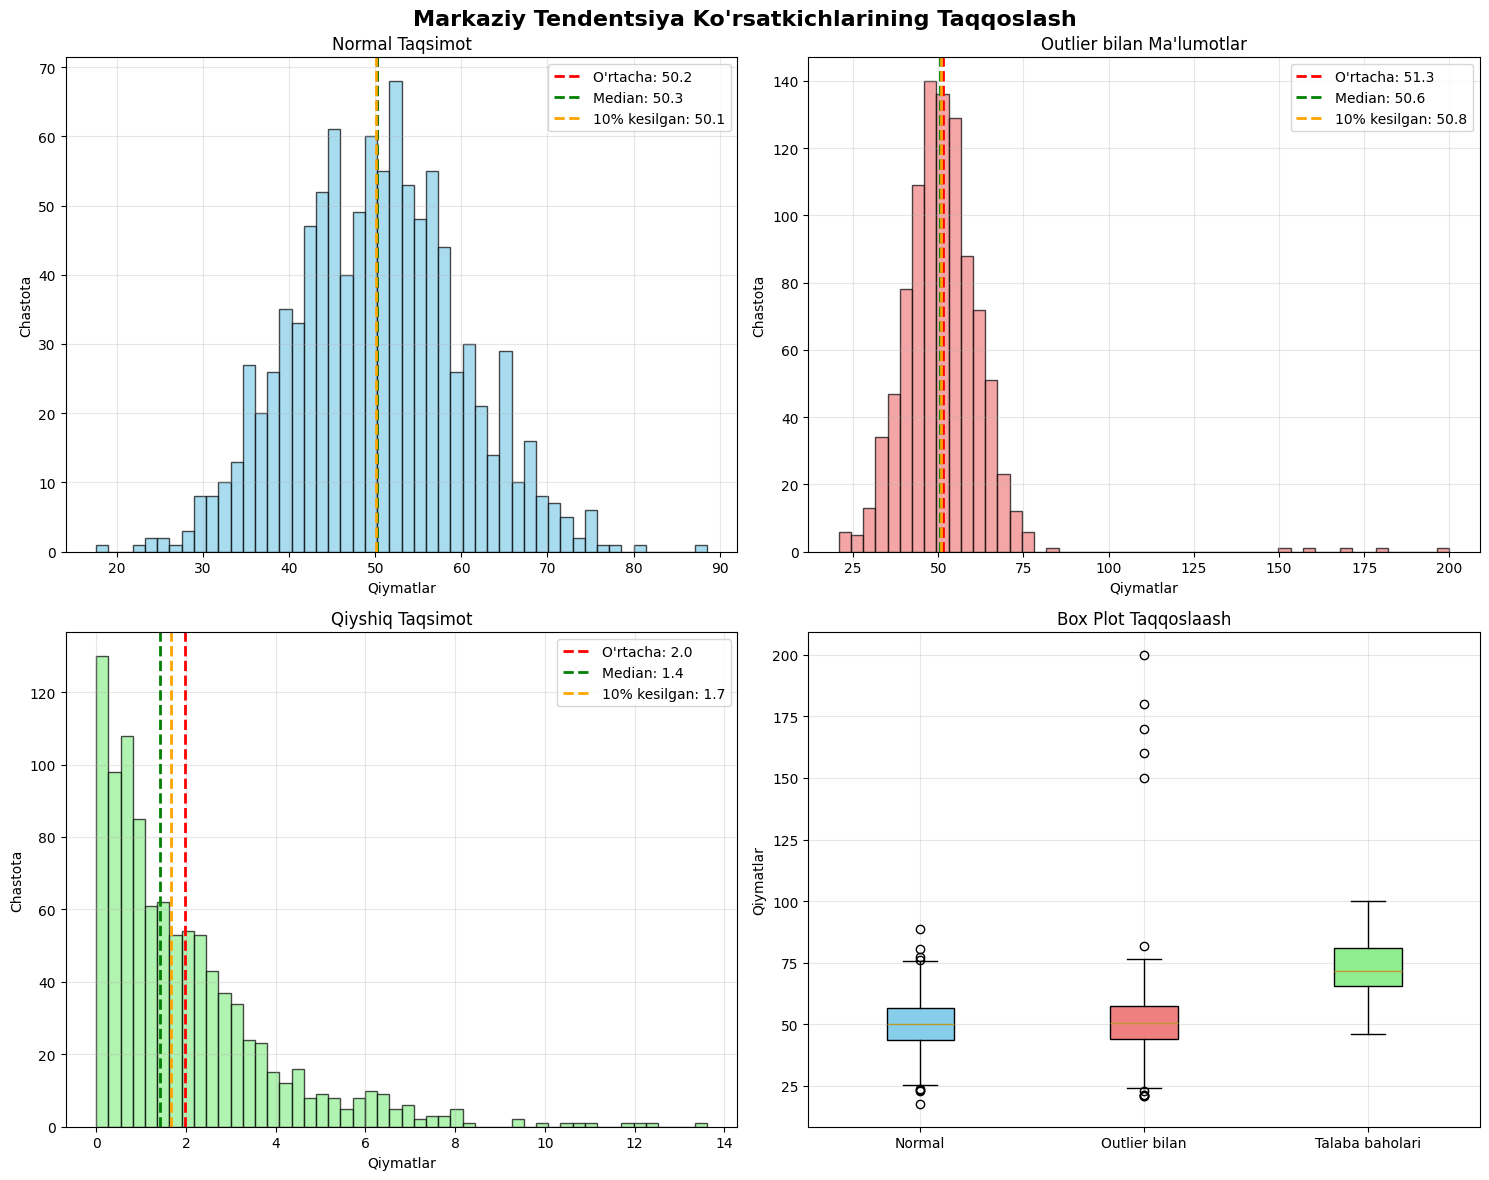


=== BARCHA KO'RSATKICHLAR JADVALI ===

                 O'rtacha Median 5% Kesilgan 10% Kesilgan Q1 (25%) Q3 (75%)    IQR    Min     Max    Std
Normal taqsimot     50.19  50.25       50.12        50.07    43.52    56.48  12.96  17.59   88.53   9.79
Outlier bilan       51.31  50.60       50.79        50.77    43.94    57.38  13.43  20.79  200.00  13.30
Qiyshiq taqsimot     1.99   1.42        1.77         1.66     0.58     2.76   2.18   0.00   13.61   1.94
Talaba baholari     73.31  71.64       73.19        72.77    65.41    81.14  15.72  46.08  100.00  12.99

=== ROBUSTLIK TAQQOSLAASH ===

Outlierning ta'siri (Outlier bilan - Normal taqsimot):
O'rtacha       :  +1.12 ( +2.2%)
Median         :  +0.34 ( +0.7%)
10% Kesilgan   :  +0.70 ( +1.4%)


In [12]:
# Visualization of central tendency measures
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Markaziy Tendentsiya Ko\'rsatkichlarining Taqqoslash', fontsize=16, fontweight='bold')

# 1. Normal distribution
ax1 = axes[0, 0]
ax1.hist(normal_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(np.mean(normal_data), color='red', linestyle='--', linewidth=2, label=f'O\'rtacha: {np.mean(normal_data):.1f}')
ax1.axvline(np.median(normal_data), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(normal_data):.1f}')
ax1.axvline(stats.trim_mean(normal_data, 0.1), color='orange', linestyle='--', linewidth=2, label=f'10% kesilgan: {stats.trim_mean(normal_data, 0.1):.1f}')
ax1.set_title('Normal Taqsimot')
ax1.set_xlabel('Qiymatlar')
ax1.set_ylabel('Chastota')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Data with outliers
ax2 = axes[0, 1]
ax2.hist(outlier_data, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(np.mean(outlier_data), color='red', linestyle='--', linewidth=2, label=f'O\'rtacha: {np.mean(outlier_data):.1f}')
ax2.axvline(np.median(outlier_data), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(outlier_data):.1f}')
ax2.axvline(stats.trim_mean(outlier_data, 0.1), color='orange', linestyle='--', linewidth=2, label=f'10% kesilgan: {stats.trim_mean(outlier_data, 0.1):.1f}')
ax2.set_title('Outlier bilan Ma\'lumotlar')
ax2.set_xlabel('Qiymatlar')
ax2.set_ylabel('Chastota')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Skewed distribution
ax3 = axes[1, 0]
ax3.hist(skewed_data, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(np.mean(skewed_data), color='red', linestyle='--', linewidth=2, label=f'O\'rtacha: {np.mean(skewed_data):.1f}')
ax3.axvline(np.median(skewed_data), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(skewed_data):.1f}')
ax3.axvline(stats.trim_mean(skewed_data, 0.1), color='orange', linestyle='--', linewidth=2, label=f'10% kesilgan: {stats.trim_mean(skewed_data, 0.1):.1f}')
ax3.set_title('Qiyshiq Taqsimot')
ax3.set_xlabel('Qiymatlar')
ax3.set_ylabel('Chastota')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Box plot comparison
ax4 = axes[1, 1]
data_sets = [normal_data, outlier_data, student_scores]
labels = ['Normal', 'Outlier bilan', 'Talaba baholari']
bp = ax4.boxplot(data_sets, labels=labels, patch_artist=True)
colors = ['skyblue', 'lightcoral', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax4.set_title('Box Plot Taqqoslaash')
ax4.set_ylabel('Qiymatlar')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table of all measures
print("\n=== BARCHA KO'RSATKICHLAR JADVALI ===\n")

datasets = {
    'Normal taqsimot': normal_data,
    'Outlier bilan': outlier_data,
    'Qiyshiq taqsimot': skewed_data[:1000],  # Limit to same size
    'Talaba baholari': student_scores
}

results_df = pd.DataFrame(index=datasets.keys(), columns=[
    'O\'rtacha', 'Median', '5% Kesilgan', '10% Kesilgan', 
    'Q1 (25%)', 'Q3 (75%)', 'IQR', 'Min', 'Max', 'Std'
])

for name, data in datasets.items():
    results_df.loc[name, 'O\'rtacha'] = f"{np.mean(data):.2f}"
    results_df.loc[name, 'Median'] = f"{np.median(data):.2f}"
    results_df.loc[name, '5% Kesilgan'] = f"{stats.trim_mean(data, 0.05):.2f}"
    results_df.loc[name, '10% Kesilgan'] = f"{stats.trim_mean(data, 0.10):.2f}"
    results_df.loc[name, 'Q1 (25%)'] = f"{np.percentile(data, 25):.2f}"
    results_df.loc[name, 'Q3 (75%)'] = f"{np.percentile(data, 75):.2f}"
    results_df.loc[name, 'IQR'] = f"{np.percentile(data, 75) - np.percentile(data, 25):.2f}"
    results_df.loc[name, 'Min'] = f"{np.min(data):.2f}"
    results_df.loc[name, 'Max'] = f"{np.max(data):.2f}"
    results_df.loc[name, 'Std'] = f"{np.std(data):.2f}"

print(results_df.to_string())

# Robustness comparison
print("\n=== ROBUSTLIK TAQQOSLAASH ===\n")
print("Outlierning ta'siri (Outlier bilan - Normal taqsimot):")

normal_stats = {
    'O\'rtacha': np.mean(normal_data),
    'Median': np.median(normal_data),
    '10% Kesilgan': stats.trim_mean(normal_data, 0.10)
}

outlier_stats = {
    'O\'rtacha': np.mean(outlier_data),
    'Median': np.median(outlier_data),
    '10% Kesilgan': stats.trim_mean(outlier_data, 0.10)
}

for measure in normal_stats.keys():
    difference = outlier_stats[measure] - normal_stats[measure]
    percent_change = (difference / normal_stats[measure]) * 100
    print(f"{measure:15s}: {difference:+6.2f} ({percent_change:+5.1f}%)")

## 8. Amaliy Misollar va Qo'llanishlar

### Real hayotda qo'llanish:

1. **O'rtacha (Mean)**:
   - Sinf o'rtacha bahosi
   - Kompaniya daromadi
   - Harorat o'rtacha qiymati

2. **Og'irlikli O'rtacha**:
   - GPA hisoblash (kredit soatlari bilan)
   - Portfolio daromadi
   - Weighted index calculations

3. **Median**:
   - Uy-joy narxlari
   - Ish haqi statistikasi
   - Daromad taqsimoti

4. **Percentillar**:
   - Test natijalari (IQ, SAT, etc.)
   - Bolalar o'sishi jadvallari
   - Moliyaviy risk ko'rsatkichlari

5. **Kesilgan O'rtacha**:
   - Olimpiya sport turlari
   - Ilmiy tadqiqotlar
   - Outlier bilan ma'lumotlar

## 9. Qachon Qaysi Ko'rsatkichni Ishlatish

| Holat | Tavsiya etiladigan ko'rsatkich | Sabab |
|-------|-------------------------------|--------|
| Normal taqsimot | O'rtacha | Eng aniq va matematik jihatdan qulay |
| Outlierlar mavjud | Median yoki Kesilgan o'rtacha | Robust, outlierga sezgir emas |
| Qiyshiq taqsimot | Median | Taqsimotning shaklini yaxshi aks ettiradi |
| Turli ahamiyatli ma'lumotlar | Og'irlikli o'rtacha/median | Har bir qiymatning ahamiyatini hisobga oladi |
| Ranking kerak | Percentillar | Nisbiy holatni ko'rsatadi |

## 10. Xulosa

Markaziy tendentsiya ko'rsatkichlari ma'lumotlar tahlilining asosini tashkil etadi. Har bir ko'rsatkichning o'z afzalliklari va kamchiliklari bor:

- **O'rtacha**: Matematik jihatdan qulay, lekin outlierga sezgir
- **Median**: Robust, outlierga bardoshli
- **Og'irlikli usullar**: Turli ahamiyatni hisobga oladi
- **Kesilgan o'rtacha**: O'rtacha va medianning kombinatsiyasi
- **Percentillar**: Batafsil taqsimot haqida ma'lumot beradi

To'g'ri ko'rsatkichni tanlash ma'lumotlaringizning tabiatiga va tahlil maqsadingizga bog'liq.